## Generating word cloud from your published PDF papers

In [52]:
PDF_path = '/Users/ashis/data/my-papers/selected_ml_pdfs/'
wordcloud_image = '/Users/ashis/data/my-papers/wordclouds/2023-03-03--research_wordcloud_selected.png'

In [53]:
#!pip install --upgrade pip
#!pip install wordcloud
#!pip install PyPDF2
#!pip install nltk

In [54]:
import string
import re
import glob
import matplotlib.pyplot as plt
import wordcloud
import PyPDF2
import nltk
from calendar import month_name
from nltk.corpus import stopwords
from tqdm import tqdm

In [55]:
ENGLISH_STOP = set(stopwords.words('english'))

In [56]:
class research_wordcloud():
	'''
    Make word cloud from all PDF under a folder

    Usage:
    rs = research(paper_path)
    rs.extract_text()
    rs.filter_text()
    rs.generate_wordcloud(figurename)
    '''
	def __init__(self, paper_path):
		'''
        find all pdf under paper_path
        '''
		self.paper_path = paper_path
		self.PDFs = glob.glob(paper_path + '/*pdf') #any PDF can be found?
		self.texts = ''  # store all texts
		self.tokens = None
		self.words = None
		self.paper_stop = ['fig','figure','supplementary', 'author','press',
                            'PubMed', 'manuscript','nt','et','al', 'laboratory',
                            'article','cold','spring','habor','harbor',
                            'additional', 'additionalfile','additiona file']
		months = [month_name[i].lower() for i in range(1,13)]
		self.paper_stop.extend(months)
		self.paper_stop.extend(list(map(lambda x: x.capitalize(), self.paper_stop)))
		self.paper_stop = set(self.paper_stop)

	def extract_text(self):
		'''
        read pdf text
        '''
		for pdf in tqdm(self.PDFs):
			with open(pdf, 'rb') as paper:
				pdf = PyPDF2.PdfReader(paper)
				for page_num in range(len(pdf.pages)-1): #skip reference
					page = pdf.pages[page_num]#pdf.getPage(page_num)
					self.texts += page.extract_text()
	
	def filter_text(self):
		'''
        remove stop words and punctuations
        '''
		self.tokens = nltk.word_tokenize(self.texts)
		self.tokens =  nltk.pos_tag(self.tokens) #(tag the nature of each word, verb? noun?)
		self.words = []
		num_regex = re.compile('[0-9]+')
		for word, tag in tqdm(self.tokens):
			IS_VERB = tag.startswith('V')
			IS_STOP = word in set(string.punctuation)
			IS_ENGLISH_STOP = word in set(ENGLISH_STOP)
			IS_WORDCLOUD_STOP = word in wordcloud.STOPWORDS
			IS_NUMBER = num_regex.search(word)
			IS_PAPER_STOP = word in self.paper_stop
			condition = [IS_VERB, IS_STOP, IS_ENGLISH_STOP,
                        IS_WORDCLOUD_STOP, IS_NUMBER, IS_PAPER_STOP]
			if not any(condition):
				if word == "coli":
					self.words.append('E. coli') #unfortunate break down of E. coli
				else:
					self.words.append(word)
		self.words = ' '.join(self.words)


	def generate_wordcloud(self, figurename):
		'''
        plot
        '''
		wc = wordcloud.WordCloud(  
                collocations=False,
                background_color='white',
                max_words=100,
                max_font_size=40, 
                scale=3,
				width=200,
				height=300
        )
		try:
			wc.generate(self.words)
			plt.imshow(wc, interpolation="bilinear")
			plt.axis('off')
			plt.savefig(figurename, bbox_inches='tight', transparent=True)
			print('Written %s' %figurename)
		except ValueError:
			print(self.words)

In [57]:
wc = research_wordcloud(PDF_path)



In [58]:
wc.extract_text()


100%|██████████| 17/17 [00:18<00:00,  1.07s/it]


In [59]:
wc.filter_text()

100%|██████████| 89237/89237 [00:00<00:00, 177738.52it/s]


Written /Users/ashis/data/my-papers/wordclouds/2023-03-03--research_wordcloud_selected.png


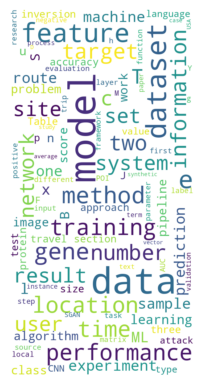

In [60]:
wc.generate_wordcloud(wordcloud_image)